In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
engage = pd.read_csv("takehome_user_engagement.csv")
engage.head(10)

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1
5,2013-12-31 03:45:04,2,1
6,2014-01-08 03:45:04,2,1
7,2014-02-03 03:45:04,2,1
8,2014-02-08 03:45:04,2,1
9,2014-02-09 03:45:04,2,1


In [3]:
print("Users: {},  Total Logins: {}".format(engage['user_id'].nunique(), len(engage)))

Users: 8823,  Total Logins: 207917


In [4]:
engage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [5]:
engage['time_stamp'] = pd.to_datetime(engage['time_stamp'], format='%Y-%m-%d %H:%M:%S')

In [6]:
engage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   time_stamp  207917 non-null  datetime64[ns]
 1   user_id     207917 non-null  int64         
 2   visited     207917 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.8 MB


In [7]:
# Defining an "adopted user" as a user who has logged into the product on three separate days in 
# at least one seven-day period, identify which factors predict future user adoption.

def adopted_logins(df, days=7, logins=3):
    from datetime import timedelta
    df['date'] = df['time_stamp'].dt.date
    df = df.drop_duplicates(subset='date').sort_values('date')
    days_passed = df['date'].diff(periods = logins - 1)
    return any(days_passed <= timedelta(days=days))

In [8]:
adopted = engage.groupby('user_id').apply(adopted_logins)
adopted.name = 'adopted_users'

In [9]:
print("Out of {} total users, {} are adopted users.".format(len(adopted), sum(adopted)))

Out of 8823 total users, 1656 are adopted users.


In [10]:
user = pd.read_csv('takehome_users.csv', encoding='latin-1')
user.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [11]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [12]:
user['creation_time'] = pd.to_datetime(user['creation_time'], format='%Y-%m-%d %H:%M:%S')

In [13]:
# Print the 5 organization IDs with the most users
user['org_id'].value_counts().head()

0    319
1    233
2    201
3    168
4    159
Name: org_id, dtype: int64

In [14]:
# Print the 5 user IDs with the most invites
user['invited_by_user_id'].value_counts().head()

10741.0    13
2527.0     12
1525.0     11
11770.0    11
2308.0     11
Name: invited_by_user_id, dtype: int64

In [15]:
engage.time_stamp = pd.to_datetime(engage.time_stamp)
engage.index = engage.time_stamp
engage.drop(labels='time_stamp', axis=1, inplace=True)

In [16]:
join_df = user.merge(adopted, how='inner',left_on='object_id',right_on='user_id')
join_df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_users
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,False
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,True
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,False
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,False
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,False


In [17]:
to_drop = list(join_df.columns[0:4])

join_df = join_df.drop(to_drop,axis=1)

In [18]:
join_df['invited_by_user_id'].fillna(value=0,inplace=True)

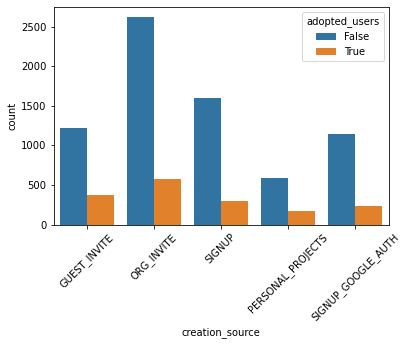

In [19]:
_ = sns.countplot(x='creation_source', data=join_df, hue='adopted_users')
_ = plt.xticks(rotation=45)

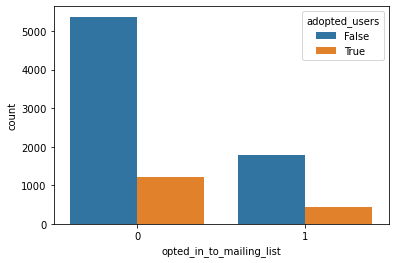

In [20]:
_ = sns.countplot(x='opted_in_to_mailing_list', data=join_df, hue='adopted_users')

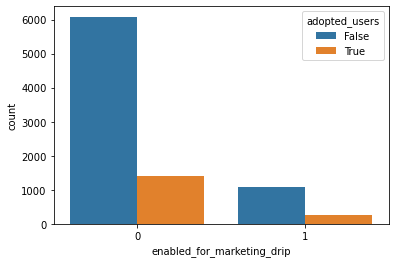

In [21]:
_ = sns.countplot(x='enabled_for_marketing_drip', data=join_df, hue='adopted_users')

In [22]:
dummy = pd.get_dummies(join_df['creation_source'])
features = pd.concat([join_df,dummy],axis=1)
features.drop('creation_source',axis=1,inplace=True)

In [23]:
for col in features.columns:
    features[col] = features[col].astype('float64')
features.head()

,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_users,GUEST_INVITE,ORG_INVITE,PERSONAL_PROJECTS,SIGNUP,SIGNUP_GOOGLE_AUTH
0,1.398139e+09,1.0,0.0,11.0,10803.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.396238e+09,0.0,0.0,1.0,316.0,1.0,0.0,1.0,0.0,0.0,0.0
2,1.363735e+09,0.0,0.0,94.0,1525.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.369210e+09,0.0,0.0,1.0,5151.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.358850e+09,0.0,0.0,193.0,5240.0,0.0,1.0,0.0,0.0,0.0,0.0


In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
feat = scaler.fit_transform(features)

pca = PCA()
comp = pca.fit_transform(feat)

In [25]:
np.sum(pca.explained_variance_ratio_[0:8])

0.9295650020816962

The value here represents the amount of variation in the data provided by the first 8 principal components in the data. We will now examine the importance of each feature individually in the set.

In [26]:
join_df.corr(method='kendall')

,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_users
last_session_creation_time,1.000000,0.006439,0.004178,0.041587,0.006796,0.397191
opted_in_to_mailing_list,0.006439,1.000000,0.488219,0.000135,0.008643,0.007485
enabled_for_marketing_drip,0.004178,0.488219,1.000000,0.000645,0.001059,0.004290
org_id,0.041587,0.000135,0.000645,1.000000,-0.020846,0.074101
invited_by_user_id,0.006796,0.008643,0.001059,-0.020846,1.000000,0.021226
adopted_users,0.397191,0.007485,0.004290,0.074101,0.021226,1.000000


Creation source tells us the most successful sources that bring the company new customers, for example org_invite (when a user is invited to the organization as a full member) as well as guest_invite secondly, are the main source for bringing in new clients. 
However, there are several factors to consider which determine how likely it is that a user will be "adopted" a.k.a. the customer has logged in at least three times in the previous seven days. From these values above we can deduce that last session creation time, organization id, invited by user id, and- as we saw previously- creation source. These values have the highest correlation among adopted users that will guide us in predicting user adoption.